In [5]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

In [6]:
seeds = list(np.arange(1,101,1))


history = {}
val_performance = {}
performance = {}

residuals = {}
true_discharge_vals = {}

In [7]:
for SEED in seeds:
    
    file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

    filt = 'Highpass'

    #window_width = [1,2,5, 200]
    #window_width = [350, 400, 450, 500]
    ww = 200
    bs = 32

    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)



    linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=list(np.arange(0,2308,1)),
                                                    shuffle=True,
                                                    batch_size=bs)
    print("Fold number: "+str(SEED))
    
    history['lstm_'+str(ww)+'_'+filt+'_Fold:'+str(SEED)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(ww)+'_'+filt+'_Fold:'+str(SEED)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(ww)+'_'+filt+'_Fold:'+str(SEED)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)
    
    pred_on_test = lstm_model.predict(multi_step_window_shuffled.test).squeeze()
    pred_on_test = np.asarray(pred_on_test)
    #pred_on_test = pred_on_test[:,-1]
    predictions_test = (pred_on_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
    
    test_true_dis = []

    for i in multi_step_window_shuffled.test.as_numpy_iterator():
        test_true_dis.append(i[1])

    test_true_dis = (test_true_dis[0].squeeze() * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
    
    residuals['Run ' + str(SEED)] = predictions_test - test_true_dis
    true_discharge_vals['Run ' + str(SEED)] = test_true_dis
    

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


2022-11-14 12:50:13.383939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-14 12:50:13.383968: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-14 12:50:13.384348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2308
Fold number: 1
Epoch 1/1000
7/7 [==============================] - 2s 157ms/step - loss: 0.8885 - mean_absolute_error: 0.7713 - val_loss: 0.4671 - val_mean_absolute_error: 0.5267
Epoch 2/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.4042 - mean_absolute_error: 0.5023 - val_loss: 0.3507 - val_mean_absolute_error: 0.4524
Epoch 3/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.2825 - mean_absolute_error: 0.4138 - val_loss: 0.3426 - val_mean_absolute_error: 0.4245
Epoch 4/1000
7/7 [==============================] - 1s 100ms/step - loss: 0.1987 - mean_absolute_error: 0.3318 - val_loss: 0.2871 - val_mean_absolute_error: 0.3775
Epoch 5/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1438 - mean_absolute_error: 0.2804 - val_loss: 0.2575 - val_mean_absolute_error: 0.3356
Epoch 6/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1075 - mean_absolute_error: 0.2435 - val_loss: 0.2160 - val_mean_absolute_error: 0.2866


7/7 [==============================] - 1s 96ms/step - loss: 0.0097 - mean_absolute_error: 0.0681 - val_loss: 0.1352 - val_mean_absolute_error: 0.1737
Epoch 25/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0063 - mean_absolute_error: 0.0542 - val_loss: 0.1328 - val_mean_absolute_error: 0.1780
Epoch 26/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0083 - mean_absolute_error: 0.0638 - val_loss: 0.1344 - val_mean_absolute_error: 0.1679
Epoch 27/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0069 - mean_absolute_error: 0.0569 - val_loss: 0.1382 - val_mean_absolute_error: 0.1748
Epoch 28/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0092 - mean_absolute_error: 0.0649 - val_loss: 0.1346 - val_mean_absolute_error: 0.1724
Epoch 29/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0058 - mean_absolute_error: 0.0524 - val_loss: 0.1326 - val_mean_absolute_error: 0.1774
Epoch 30/1000
7/7 [===========

Epoch 28/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0056 - mean_absolute_error: 0.0498 - val_loss: 0.1816 - val_mean_absolute_error: 0.2364
Epoch 29/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0147 - mean_absolute_error: 0.0895 - val_loss: 0.1565 - val_mean_absolute_error: 0.2022
Epoch 30/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0358 - mean_absolute_error: 0.1329 - val_loss: 0.1386 - val_mean_absolute_error: 0.2374
Epoch 31/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0655 - mean_absolute_error: 0.1866 - val_loss: 0.1673 - val_mean_absolute_error: 0.2678
Epoch 32/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0963 - mean_absolute_error: 0.2199 - val_loss: 0.1901 - val_mean_absolute_error: 0.2880
Epoch 33/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0691 - mean_absolute_error: 0.1953 - val_loss: 0.1412 - val_mean_absolute_error: 0.2445
Epoch 34/1000
1/

7/7 [==============================] - 1s 93ms/step - loss: 0.0177 - mean_absolute_error: 0.0889 - val_loss: 0.1332 - val_mean_absolute_error: 0.2098
Epoch 19/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0135 - mean_absolute_error: 0.0748 - val_loss: 0.1183 - val_mean_absolute_error: 0.1872
Epoch 20/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0092 - mean_absolute_error: 0.0651 - val_loss: 0.1157 - val_mean_absolute_error: 0.1871
Epoch 21/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0067 - mean_absolute_error: 0.0553 - val_loss: 0.1166 - val_mean_absolute_error: 0.1752
Epoch 22/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0070 - mean_absolute_error: 0.0537 - val_loss: 0.1258 - val_mean_absolute_error: 0.1839
Epoch 23/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0082 - mean_absolute_error: 0.0575 - val_loss: 0.1303 - val_mean_absolute_error: 0.1954
Epoch 24/1000
7/7 [===========

7/7 [==============================] - 1s 92ms/step - loss: 0.0237 - mean_absolute_error: 0.0895 - val_loss: 0.1224 - val_mean_absolute_error: 0.2114
Epoch 33/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0274 - mean_absolute_error: 0.1125 - val_loss: 0.1239 - val_mean_absolute_error: 0.2043
Epoch 34/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0225 - mean_absolute_error: 0.0987 - val_loss: 0.1189 - val_mean_absolute_error: 0.2232
Epoch 35/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0239 - mean_absolute_error: 0.1135 - val_loss: 0.0953 - val_mean_absolute_error: 0.1675
Epoch 36/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0179 - mean_absolute_error: 0.0957 - val_loss: 0.1139 - val_mean_absolute_error: 0.2290
Epoch 37/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0241 - mean_absolute_error: 0.1163 - val_loss: 0.0995 - val_mean_absolute_error: 0.1863
Epoch 38/1000
7/7 [===========

7/7 [==============================] - 1s 92ms/step - loss: 0.0208 - mean_absolute_error: 0.1006 - val_loss: 0.1131 - val_mean_absolute_error: 0.1686
Epoch 22/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0276 - mean_absolute_error: 0.1051 - val_loss: 0.1246 - val_mean_absolute_error: 0.2111
Epoch 23/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0180 - mean_absolute_error: 0.0923 - val_loss: 0.1034 - val_mean_absolute_error: 0.1649
Epoch 24/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0192 - mean_absolute_error: 0.0939 - val_loss: 0.1320 - val_mean_absolute_error: 0.2118
Epoch 25/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0301 - mean_absolute_error: 0.1180 - val_loss: 0.1138 - val_mean_absolute_error: 0.2004
Epoch 26/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0151 - mean_absolute_error: 0.0821 - val_loss: 0.1058 - val_mean_absolute_error: 0.1713
Epoch 27/1000
7/7 [===========

7/7 [==============================] - 1s 93ms/step - loss: 0.2330 - mean_absolute_error: 0.3710 - val_loss: 0.2946 - val_mean_absolute_error: 0.4128
Epoch 5/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.1880 - mean_absolute_error: 0.3252 - val_loss: 0.2498 - val_mean_absolute_error: 0.3592
Epoch 6/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.1546 - mean_absolute_error: 0.2831 - val_loss: 0.2097 - val_mean_absolute_error: 0.3301
Epoch 7/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1232 - mean_absolute_error: 0.2466 - val_loss: 0.2189 - val_mean_absolute_error: 0.3281
Epoch 8/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1156 - mean_absolute_error: 0.2347 - val_loss: 0.1763 - val_mean_absolute_error: 0.2850
Epoch 9/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0843 - mean_absolute_error: 0.1962 - val_loss: 0.1834 - val_mean_absolute_error: 0.2960
Epoch 10/1000
7/7 [================

Epoch 14/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0587 - mean_absolute_error: 0.1697 - val_loss: 0.1705 - val_mean_absolute_error: 0.2509
Epoch 15/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0540 - mean_absolute_error: 0.1558 - val_loss: 0.1643 - val_mean_absolute_error: 0.2537
Epoch 16/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0531 - mean_absolute_error: 0.1604 - val_loss: 0.1467 - val_mean_absolute_error: 0.2356
Epoch 17/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0376 - mean_absolute_error: 0.1338 - val_loss: 0.1464 - val_mean_absolute_error: 0.2309
Epoch 18/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0264 - mean_absolute_error: 0.1201 - val_loss: 0.1448 - val_mean_absolute_error: 0.2090
Epoch 19/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0189 - mean_absolute_error: 0.0955 - val_loss: 0.1367 - val_mean_absolute_error: 0.1920
Epoch 20/1000
7/

1/1 [==============================] - 0s 306ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 12
Epoch 1/1000
7/7 [==============================] - 2s 150ms/step - loss: 0.9151 - mean_absolute_error: 0.7512 - val_loss: 0.7635 - val_mean_absolute_error: 0.6913
Epoch 2/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.4615 - mean_absolute_error: 0.5433 - val_loss: 0.6287 - val_mean_absolute_error: 0.5740
Epoch 3/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.2918 - mean_absolute_error: 0.4131 - val_loss: 0.4203 - val_mean_absolute_error: 0.4600
Epoch 4/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.2030 - mean_absolute_error: 0.3441 - val_loss: 0.4051 - val_mean_absolute_error: 0.4433
Epoch 5/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.1437 - mean_absolute_error: 0.2826 - val_loss: 0.3535 - val_mean_absolute_error: 0.4099
Epoch 6/1000
7/7 [==============================] - 1s

1/1 [==============================] - 0s 314ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 13
Epoch 1/1000
7/7 [==============================] - 2s 153ms/step - loss: 0.7652 - mean_absolute_error: 0.6807 - val_loss: 0.4351 - val_mean_absolute_error: 0.4876
Epoch 2/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.3799 - mean_absolute_error: 0.4809 - val_loss: 0.3146 - val_mean_absolute_error: 0.4584
Epoch 3/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.2406 - mean_absolute_error: 0.3862 - val_loss: 0.2108 - val_mean_absolute_error: 0.3503
Epoch 4/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1953 - mean_absolute_error: 0.3314 - val_loss: 0.1682 - val_mean_absolute_error: 0.3095
Epoch 5/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.1534 - mean_absolute_error: 0.2858 - val_loss: 0.1448 - val_mean_absolute_error: 0.2726
Epoch 6/1000
7/7 [==============================] - 1s

1/1 [==============================] - 0s 337ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 14
Epoch 1/1000
7/7 [==============================] - 2s 153ms/step - loss: 0.8118 - mean_absolute_error: 0.7138 - val_loss: 0.7249 - val_mean_absolute_error: 0.6987
Epoch 2/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.5142 - mean_absolute_error: 0.5534 - val_loss: 0.3832 - val_mean_absolute_error: 0.4617
Epoch 3/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.3279 - mean_absolute_error: 0.4303 - val_loss: 0.3719 - val_mean_absolute_error: 0.4368
Epoch 4/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.2366 - mean_absolute_error: 0.3589 - val_loss: 0.3561 - val_mean_absolute_error: 0.4451
Epoch 5/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2085 - mean_absolute_error: 0.3301 - val_loss: 0.2763 - val_mean_absolute_error: 0.3662
Epoch 6/1000
7/7 [==============================] - 1s

7/7 [==============================] - 1s 93ms/step - loss: 0.0175 - mean_absolute_error: 0.0738 - val_loss: 0.1035 - val_mean_absolute_error: 0.1863
Epoch 22/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0149 - mean_absolute_error: 0.0649 - val_loss: 0.1129 - val_mean_absolute_error: 0.1907
Epoch 23/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0124 - mean_absolute_error: 0.0576 - val_loss: 0.0970 - val_mean_absolute_error: 0.1627
Epoch 24/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0109 - mean_absolute_error: 0.0501 - val_loss: 0.0970 - val_mean_absolute_error: 0.1612
Epoch 25/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0093 - mean_absolute_error: 0.0448 - val_loss: 0.0979 - val_mean_absolute_error: 0.1553
Epoch 26/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0082 - mean_absolute_error: 0.0379 - val_loss: 0.0942 - val_mean_absolute_error: 0.1492
Epoch 27/1000
7/7 [===========

Epoch 21/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0291 - mean_absolute_error: 0.1275 - val_loss: 0.1440 - val_mean_absolute_error: 0.2343
Epoch 22/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0242 - mean_absolute_error: 0.1119 - val_loss: 0.1053 - val_mean_absolute_error: 0.1720
Epoch 23/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0174 - mean_absolute_error: 0.1002 - val_loss: 0.1140 - val_mean_absolute_error: 0.1680
Epoch 24/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0161 - mean_absolute_error: 0.0936 - val_loss: 0.1283 - val_mean_absolute_error: 0.1931
Epoch 25/1000
1/1 [==============================] - 0s 304ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 17
Epoch 1/1000
7/7 [==============================] - 2s 145ms/step - loss: 0.7684 - mean_absolute_error: 0.7298 - val_loss: 0.4564 - val_mean_absolute_error: 0.5114
Epoch 2/1000
7/7 [==================

7/7 [==============================] - 1s 92ms/step - loss: 0.0056 - mean_absolute_error: 0.0520 - val_loss: 0.0750 - val_mean_absolute_error: 0.1515
Epoch 45/1000
7/7 [==============================] - 1s 85ms/step - loss: 0.0085 - mean_absolute_error: 0.0649 - val_loss: 0.0711 - val_mean_absolute_error: 0.1317
Epoch 46/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0078 - mean_absolute_error: 0.0618 - val_loss: 0.0782 - val_mean_absolute_error: 0.1478
Epoch 47/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0084 - mean_absolute_error: 0.0666 - val_loss: 0.0756 - val_mean_absolute_error: 0.1415
Epoch 48/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0068 - mean_absolute_error: 0.0581 - val_loss: 0.0709 - val_mean_absolute_error: 0.1347
Epoch 49/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0071 - mean_absolute_error: 0.0585 - val_loss: 0.0797 - val_mean_absolute_error: 0.1531
Epoch 50/1000
7/7 [===========

Epoch 42/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0029 - mean_absolute_error: 0.0376 - val_loss: 0.1852 - val_mean_absolute_error: 0.2106
Epoch 43/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0024 - mean_absolute_error: 0.0319 - val_loss: 0.1862 - val_mean_absolute_error: 0.2360
Epoch 44/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0033 - mean_absolute_error: 0.0414 - val_loss: 0.1864 - val_mean_absolute_error: 0.2101
Epoch 45/1000
1/1 [==============================] - 0s 316ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 19
Epoch 1/1000
7/7 [==============================] - 2s 156ms/step - loss: 0.8503 - mean_absolute_error: 0.7293 - val_loss: 0.3786 - val_mean_absolute_error: 0.4388
Epoch 2/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.3770 - mean_absolute_error: 0.4808 - val_loss: 0.3694 - val_mean_absolute_error: 0.4872
Epoch 3/1000
7/7 [===================

7/7 [==============================] - 1s 93ms/step - loss: 0.0668 - mean_absolute_error: 0.1703 - val_loss: 0.2722 - val_mean_absolute_error: 0.3283
Epoch 13/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0795 - mean_absolute_error: 0.1844 - val_loss: 0.2414 - val_mean_absolute_error: 0.3121
Epoch 14/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0607 - mean_absolute_error: 0.1581 - val_loss: 0.2299 - val_mean_absolute_error: 0.2822
Epoch 15/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0368 - mean_absolute_error: 0.1285 - val_loss: 0.2285 - val_mean_absolute_error: 0.2728
Epoch 16/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0272 - mean_absolute_error: 0.1101 - val_loss: 0.1954 - val_mean_absolute_error: 0.2373
Epoch 17/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0189 - mean_absolute_error: 0.0927 - val_loss: 0.1867 - val_mean_absolute_error: 0.2198
Epoch 18/1000
7/7 [===========

Epoch 33/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0112 - mean_absolute_error: 0.0661 - val_loss: 0.1271 - val_mean_absolute_error: 0.2064
Epoch 34/1000
7/7 [==============================] - 1s 88ms/step - loss: 0.0118 - mean_absolute_error: 0.0748 - val_loss: 0.1374 - val_mean_absolute_error: 0.2003
Epoch 35/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0090 - mean_absolute_error: 0.0608 - val_loss: 0.1346 - val_mean_absolute_error: 0.1889
Epoch 36/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0068 - mean_absolute_error: 0.0494 - val_loss: 0.1273 - val_mean_absolute_error: 0.1958
Epoch 37/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0070 - mean_absolute_error: 0.0539 - val_loss: 0.1307 - val_mean_absolute_error: 0.1772
Epoch 38/1000
7/7 [==============================] - 1s 99ms/step - loss: 0.0050 - mean_absolute_error: 0.0356 - val_loss: 0.1338 - val_mean_absolute_error: 0.1795
Epoch 39/1000
7/

7/7 [==============================] - 2s 151ms/step - loss: 0.9637 - mean_absolute_error: 0.7526 - val_loss: 0.6602 - val_mean_absolute_error: 0.6976
Epoch 2/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.4997 - mean_absolute_error: 0.5799 - val_loss: 0.5741 - val_mean_absolute_error: 0.6060
Epoch 3/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.3837 - mean_absolute_error: 0.4827 - val_loss: 0.5148 - val_mean_absolute_error: 0.5261
Epoch 4/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.3109 - mean_absolute_error: 0.4161 - val_loss: 0.4610 - val_mean_absolute_error: 0.4844
Epoch 5/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.2402 - mean_absolute_error: 0.3668 - val_loss: 0.3659 - val_mean_absolute_error: 0.4217
Epoch 6/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.2092 - mean_absolute_error: 0.3294 - val_loss: 0.3490 - val_mean_absolute_error: 0.3858
Epoch 7/1000
7/7 [================

Epoch 17/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0128 - mean_absolute_error: 0.0682 - val_loss: 0.0842 - val_mean_absolute_error: 0.1619
Epoch 18/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0108 - mean_absolute_error: 0.0618 - val_loss: 0.0796 - val_mean_absolute_error: 0.1632
Epoch 19/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0101 - mean_absolute_error: 0.0640 - val_loss: 0.0804 - val_mean_absolute_error: 0.1548
Epoch 20/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0077 - mean_absolute_error: 0.0526 - val_loss: 0.0810 - val_mean_absolute_error: 0.1585
Epoch 21/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0079 - mean_absolute_error: 0.0588 - val_loss: 0.0759 - val_mean_absolute_error: 0.1460
Epoch 22/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0082 - mean_absolute_error: 0.0602 - val_loss: 0.0723 - val_mean_absolute_error: 0.1551
Epoch 23/1000
7/

7/7 [==============================] - 1s 91ms/step - loss: 0.0175 - mean_absolute_error: 0.0942 - val_loss: 0.1295 - val_mean_absolute_error: 0.2031
Epoch 18/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0172 - mean_absolute_error: 0.0920 - val_loss: 0.1825 - val_mean_absolute_error: 0.2984
Epoch 19/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0312 - mean_absolute_error: 0.1334 - val_loss: 0.1224 - val_mean_absolute_error: 0.2013
Epoch 20/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0274 - mean_absolute_error: 0.1182 - val_loss: 0.1343 - val_mean_absolute_error: 0.2707
Epoch 21/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0313 - mean_absolute_error: 0.1360 - val_loss: 0.1206 - val_mean_absolute_error: 0.2177
Epoch 22/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0172 - mean_absolute_error: 0.0928 - val_loss: 0.1573 - val_mean_absolute_error: 0.2547
Epoch 23/1000
7/7 [===========

Epoch 30/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0014 - mean_absolute_error: 0.0262 - val_loss: 0.1286 - val_mean_absolute_error: 0.1872
Epoch 31/1000
7/7 [==============================] - 1s 94ms/step - loss: 8.7438e-04 - mean_absolute_error: 0.0198 - val_loss: 0.1287 - val_mean_absolute_error: 0.1876
Epoch 32/1000
7/7 [==============================] - 1s 93ms/step - loss: 8.6245e-04 - mean_absolute_error: 0.0206 - val_loss: 0.1280 - val_mean_absolute_error: 0.1872
Epoch 33/1000
1/1 [==============================] - 0s 321ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 26
Epoch 1/1000
7/7 [==============================] - 2s 147ms/step - loss: 0.9398 - mean_absolute_error: 0.7482 - val_loss: 0.5931 - val_mean_absolute_error: 0.6136
Epoch 2/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.5043 - mean_absolute_error: 0.5490 - val_loss: 0.3960 - val_mean_absolute_error: 0.4744
Epoch 3/1000
7/7 [===========

7/7 [==============================] - 1s 90ms/step - loss: 0.0199 - mean_absolute_error: 0.0974 - val_loss: 0.1967 - val_mean_absolute_error: 0.2665
Epoch 24/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0143 - mean_absolute_error: 0.0816 - val_loss: 0.1740 - val_mean_absolute_error: 0.2352
Epoch 25/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0095 - mean_absolute_error: 0.0647 - val_loss: 0.1671 - val_mean_absolute_error: 0.2399
Epoch 26/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0098 - mean_absolute_error: 0.0654 - val_loss: 0.1801 - val_mean_absolute_error: 0.2413
Epoch 27/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0077 - mean_absolute_error: 0.0551 - val_loss: 0.1765 - val_mean_absolute_error: 0.2342
Epoch 28/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0071 - mean_absolute_error: 0.0527 - val_loss: 0.1638 - val_mean_absolute_error: 0.2318
Epoch 29/1000
7/7 [===========

1/1 [==============================] - 0s 308ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 29
Epoch 1/1000
7/7 [==============================] - 2s 155ms/step - loss: 0.8135 - mean_absolute_error: 0.7418 - val_loss: 0.7210 - val_mean_absolute_error: 0.7290
Epoch 2/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.4967 - mean_absolute_error: 0.5639 - val_loss: 0.4479 - val_mean_absolute_error: 0.4867
Epoch 3/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.3286 - mean_absolute_error: 0.4218 - val_loss: 0.4643 - val_mean_absolute_error: 0.5363
Epoch 4/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.2679 - mean_absolute_error: 0.3834 - val_loss: 0.4255 - val_mean_absolute_error: 0.4821
Epoch 5/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.2098 - mean_absolute_error: 0.3276 - val_loss: 0.3725 - val_mean_absolute_error: 0.4315
Epoch 6/1000
7/7 [==============================] - 1

1/1 [==============================] - 0s 310ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 30
Epoch 1/1000
7/7 [==============================] - 2s 157ms/step - loss: 0.8379 - mean_absolute_error: 0.7171 - val_loss: 0.4485 - val_mean_absolute_error: 0.5267
Epoch 2/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.3933 - mean_absolute_error: 0.4731 - val_loss: 0.3800 - val_mean_absolute_error: 0.4408
Epoch 3/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.2379 - mean_absolute_error: 0.3735 - val_loss: 0.2767 - val_mean_absolute_error: 0.3908
Epoch 4/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.1862 - mean_absolute_error: 0.3215 - val_loss: 0.2743 - val_mean_absolute_error: 0.3898
Epoch 5/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.1726 - mean_absolute_error: 0.3057 - val_loss: 0.2742 - val_mean_absolute_error: 0.4065
Epoch 6/1000
7/7 [==============================] - 1s

7/7 [==============================] - 1s 97ms/step - loss: 0.0185 - mean_absolute_error: 0.0724 - val_loss: 0.1240 - val_mean_absolute_error: 0.1650
Epoch 20/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0295 - mean_absolute_error: 0.0887 - val_loss: 0.1370 - val_mean_absolute_error: 0.2072
Epoch 21/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0417 - mean_absolute_error: 0.1297 - val_loss: 0.1144 - val_mean_absolute_error: 0.1777
Epoch 22/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0321 - mean_absolute_error: 0.1120 - val_loss: 0.1369 - val_mean_absolute_error: 0.2191
Epoch 23/1000
7/7 [==============================] - 1s 88ms/step - loss: 0.0349 - mean_absolute_error: 0.1335 - val_loss: 0.1236 - val_mean_absolute_error: 0.2000
Epoch 24/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0298 - mean_absolute_error: 0.1225 - val_loss: 0.1447 - val_mean_absolute_error: 0.2209
Epoch 25/1000
7/7 [===========

7/7 [==============================] - 1s 95ms/step - loss: 0.0277 - mean_absolute_error: 0.1121 - val_loss: 0.1641 - val_mean_absolute_error: 0.2510
Epoch 11/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0264 - mean_absolute_error: 0.1032 - val_loss: 0.1734 - val_mean_absolute_error: 0.2411
Epoch 12/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0231 - mean_absolute_error: 0.0899 - val_loss: 0.1519 - val_mean_absolute_error: 0.2107
Epoch 13/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0170 - mean_absolute_error: 0.0843 - val_loss: 0.1553 - val_mean_absolute_error: 0.2056
Epoch 14/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0217 - mean_absolute_error: 0.1003 - val_loss: 0.1617 - val_mean_absolute_error: 0.2352
Epoch 15/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0273 - mean_absolute_error: 0.1084 - val_loss: 0.2143 - val_mean_absolute_error: 0.3145
Epoch 16/1000
7/7 [===========

7/7 [==============================] - 1s 94ms/step - loss: 0.0273 - mean_absolute_error: 0.1065 - val_loss: 0.1136 - val_mean_absolute_error: 0.1914
Epoch 17/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0218 - mean_absolute_error: 0.0922 - val_loss: 0.1203 - val_mean_absolute_error: 0.1950
Epoch 18/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0199 - mean_absolute_error: 0.0847 - val_loss: 0.1302 - val_mean_absolute_error: 0.2190
Epoch 19/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0252 - mean_absolute_error: 0.0946 - val_loss: 0.1159 - val_mean_absolute_error: 0.1885
Epoch 20/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0268 - mean_absolute_error: 0.1062 - val_loss: 0.1139 - val_mean_absolute_error: 0.1856
Epoch 21/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0145 - mean_absolute_error: 0.0776 - val_loss: 0.1136 - val_mean_absolute_error: 0.1849
Epoch 22/1000
7/7 [===========

Epoch 25/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0080 - mean_absolute_error: 0.0491 - val_loss: 0.0795 - val_mean_absolute_error: 0.1617
Epoch 26/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0145 - mean_absolute_error: 0.0775 - val_loss: 0.0651 - val_mean_absolute_error: 0.1219
Epoch 27/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0143 - mean_absolute_error: 0.0732 - val_loss: 0.0899 - val_mean_absolute_error: 0.1906
Epoch 28/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0197 - mean_absolute_error: 0.0936 - val_loss: 0.0699 - val_mean_absolute_error: 0.1454
Epoch 29/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0179 - mean_absolute_error: 0.0890 - val_loss: 0.0830 - val_mean_absolute_error: 0.1841
Epoch 30/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0152 - mean_absolute_error: 0.0871 - val_loss: 0.0670 - val_mean_absolute_error: 0.1327
Epoch 31/1000
7/

7/7 [==============================] - 1s 95ms/step - loss: 0.0738 - mean_absolute_error: 0.1945 - val_loss: 0.1686 - val_mean_absolute_error: 0.2719
Epoch 10/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0756 - mean_absolute_error: 0.1866 - val_loss: 0.1689 - val_mean_absolute_error: 0.2926
Epoch 11/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0639 - mean_absolute_error: 0.1795 - val_loss: 0.1646 - val_mean_absolute_error: 0.2696
Epoch 12/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0434 - mean_absolute_error: 0.1537 - val_loss: 0.1697 - val_mean_absolute_error: 0.2612
Epoch 13/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0333 - mean_absolute_error: 0.1266 - val_loss: 0.1806 - val_mean_absolute_error: 0.2655
Epoch 14/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0240 - mean_absolute_error: 0.1099 - val_loss: 0.1446 - val_mean_absolute_error: 0.2319
Epoch 15/1000
7/7 [===========

Epoch 31/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0041 - mean_absolute_error: 0.0458 - val_loss: 0.1171 - val_mean_absolute_error: 0.1815
Epoch 32/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0036 - mean_absolute_error: 0.0454 - val_loss: 0.1079 - val_mean_absolute_error: 0.1578
Epoch 33/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0021 - mean_absolute_error: 0.0312 - val_loss: 0.1095 - val_mean_absolute_error: 0.1594
Epoch 34/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0019 - mean_absolute_error: 0.0315 - val_loss: 0.1120 - val_mean_absolute_error: 0.1629
Epoch 35/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0014 - mean_absolute_error: 0.0276 - val_loss: 0.1094 - val_mean_absolute_error: 0.1522
Epoch 36/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0012 - mean_absolute_error: 0.0235 - val_loss: 0.1088 - val_mean_absolute_error: 0.1563
Epoch 37/1000
7/

7/7 [==============================] - 1s 96ms/step - loss: 0.2139 - mean_absolute_error: 0.3361 - val_loss: 0.3028 - val_mean_absolute_error: 0.3957
Epoch 5/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.1565 - mean_absolute_error: 0.2893 - val_loss: 0.2555 - val_mean_absolute_error: 0.3412
Epoch 6/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1131 - mean_absolute_error: 0.2385 - val_loss: 0.2242 - val_mean_absolute_error: 0.3022
Epoch 7/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0829 - mean_absolute_error: 0.2016 - val_loss: 0.1874 - val_mean_absolute_error: 0.2623
Epoch 8/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0666 - mean_absolute_error: 0.1804 - val_loss: 0.1815 - val_mean_absolute_error: 0.2479
Epoch 9/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0490 - mean_absolute_error: 0.1544 - val_loss: 0.1685 - val_mean_absolute_error: 0.2219
Epoch 10/1000
7/7 [================

Epoch 18/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0318 - mean_absolute_error: 0.1225 - val_loss: 0.2008 - val_mean_absolute_error: 0.2575
Epoch 19/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0313 - mean_absolute_error: 0.1207 - val_loss: 0.1836 - val_mean_absolute_error: 0.2324
Epoch 20/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0574 - mean_absolute_error: 0.1660 - val_loss: 0.3234 - val_mean_absolute_error: 0.3468
Epoch 21/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0647 - mean_absolute_error: 0.1866 - val_loss: 0.2115 - val_mean_absolute_error: 0.2660
Epoch 22/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0390 - mean_absolute_error: 0.1440 - val_loss: 0.2203 - val_mean_absolute_error: 0.2522
Epoch 23/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0295 - mean_absolute_error: 0.1196 - val_loss: 0.2627 - val_mean_absolute_error: 0.2777
Epoch 24/1000
7/

7/7 [==============================] - 1s 92ms/step - loss: 0.0020 - mean_absolute_error: 0.0335 - val_loss: 0.0524 - val_mean_absolute_error: 0.0842
Epoch 38/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0014 - mean_absolute_error: 0.0262 - val_loss: 0.0500 - val_mean_absolute_error: 0.0879
Epoch 39/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0014 - mean_absolute_error: 0.0281 - val_loss: 0.0524 - val_mean_absolute_error: 0.0905
Epoch 40/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0013 - mean_absolute_error: 0.0264 - val_loss: 0.0538 - val_mean_absolute_error: 0.0880
Epoch 41/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0012 - mean_absolute_error: 0.0242 - val_loss: 0.0510 - val_mean_absolute_error: 0.0895
Epoch 42/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0013 - mean_absolute_error: 0.0269 - val_loss: 0.0508 - val_mean_absolute_error: 0.0805
Epoch 43/1000
7/7 [===========

7/7 [==============================] - 1s 96ms/step - loss: 0.1243 - mean_absolute_error: 0.2556 - val_loss: 0.1683 - val_mean_absolute_error: 0.2908
Epoch 6/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0829 - mean_absolute_error: 0.2066 - val_loss: 0.1441 - val_mean_absolute_error: 0.2524
Epoch 7/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0618 - mean_absolute_error: 0.1718 - val_loss: 0.1334 - val_mean_absolute_error: 0.2328
Epoch 8/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0438 - mean_absolute_error: 0.1447 - val_loss: 0.1324 - val_mean_absolute_error: 0.2233
Epoch 9/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0307 - mean_absolute_error: 0.1239 - val_loss: 0.1143 - val_mean_absolute_error: 0.1995
Epoch 10/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0222 - mean_absolute_error: 0.1011 - val_loss: 0.1123 - val_mean_absolute_error: 0.1949
Epoch 11/1000
7/7 [===============

Epoch 26/1000
1/1 [==============================] - 0s 306ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 47
Epoch 1/1000
7/7 [==============================] - 2s 150ms/step - loss: 1.0758 - mean_absolute_error: 0.8093 - val_loss: 0.5897 - val_mean_absolute_error: 0.6346
Epoch 2/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.5087 - mean_absolute_error: 0.5686 - val_loss: 0.4689 - val_mean_absolute_error: 0.5227
Epoch 3/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.3370 - mean_absolute_error: 0.4374 - val_loss: 0.4317 - val_mean_absolute_error: 0.4773
Epoch 4/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.2878 - mean_absolute_error: 0.3927 - val_loss: 0.3811 - val_mean_absolute_error: 0.4701
Epoch 5/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2515 - mean_absolute_error: 0.3721 - val_loss: 0.3362 - val_mean_absolute_error: 0.4371
Epoch 6/1000
7/7 [======================

7/7 [==============================] - 1s 94ms/step - loss: 0.0082 - mean_absolute_error: 0.0626 - val_loss: 0.1159 - val_mean_absolute_error: 0.1724
Epoch 20/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0063 - mean_absolute_error: 0.0536 - val_loss: 0.1095 - val_mean_absolute_error: 0.1816
Epoch 21/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0079 - mean_absolute_error: 0.0628 - val_loss: 0.1067 - val_mean_absolute_error: 0.1668
Epoch 22/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0057 - mean_absolute_error: 0.0534 - val_loss: 0.1179 - val_mean_absolute_error: 0.1793
Epoch 23/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0062 - mean_absolute_error: 0.0586 - val_loss: 0.1122 - val_mean_absolute_error: 0.1765
Epoch 24/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0061 - mean_absolute_error: 0.0534 - val_loss: 0.1079 - val_mean_absolute_error: 0.1899
Epoch 25/1000
7/7 [===========

7/7 [==============================] - 1s 99ms/step - loss: 0.1781 - mean_absolute_error: 0.3039 - val_loss: 0.2297 - val_mean_absolute_error: 0.3638
Epoch 6/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1328 - mean_absolute_error: 0.2608 - val_loss: 0.1680 - val_mean_absolute_error: 0.2913
Epoch 7/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0923 - mean_absolute_error: 0.2144 - val_loss: 0.1365 - val_mean_absolute_error: 0.2561
Epoch 8/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0655 - mean_absolute_error: 0.1775 - val_loss: 0.1124 - val_mean_absolute_error: 0.2250
Epoch 9/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0487 - mean_absolute_error: 0.1456 - val_loss: 0.1036 - val_mean_absolute_error: 0.2069
Epoch 10/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0364 - mean_absolute_error: 0.1240 - val_loss: 0.0991 - val_mean_absolute_error: 0.1951
Epoch 11/1000
7/7 [===============

Epoch 18/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0188 - mean_absolute_error: 0.0831 - val_loss: 0.1551 - val_mean_absolute_error: 0.2200
Epoch 19/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0172 - mean_absolute_error: 0.0794 - val_loss: 0.1493 - val_mean_absolute_error: 0.2138
Epoch 20/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0131 - mean_absolute_error: 0.0667 - val_loss: 0.1481 - val_mean_absolute_error: 0.2021
Epoch 21/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0114 - mean_absolute_error: 0.0606 - val_loss: 0.1474 - val_mean_absolute_error: 0.2021
Epoch 22/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0095 - mean_absolute_error: 0.0579 - val_loss: 0.1450 - val_mean_absolute_error: 0.2024
Epoch 23/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0082 - mean_absolute_error: 0.0525 - val_loss: 0.1416 - val_mean_absolute_error: 0.2077
Epoch 24/1000
7/

7/7 [==============================] - 1s 94ms/step - loss: 0.0281 - mean_absolute_error: 0.1051 - val_loss: 0.1570 - val_mean_absolute_error: 0.2246
Epoch 15/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0326 - mean_absolute_error: 0.1176 - val_loss: 0.1601 - val_mean_absolute_error: 0.2385
Epoch 16/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0382 - mean_absolute_error: 0.1301 - val_loss: 0.1619 - val_mean_absolute_error: 0.2357
Epoch 17/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0315 - mean_absolute_error: 0.1190 - val_loss: 0.1483 - val_mean_absolute_error: 0.2153
Epoch 18/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0288 - mean_absolute_error: 0.1161 - val_loss: 0.1702 - val_mean_absolute_error: 0.2373
Epoch 19/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0296 - mean_absolute_error: 0.1205 - val_loss: 0.1555 - val_mean_absolute_error: 0.2161
Epoch 20/1000
7/7 [===========

7/7 [==============================] - 1s 97ms/step - loss: 0.0747 - mean_absolute_error: 0.1837 - val_loss: 0.2527 - val_mean_absolute_error: 0.3112
Epoch 14/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0651 - mean_absolute_error: 0.1698 - val_loss: 0.2735 - val_mean_absolute_error: 0.3100
Epoch 15/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0531 - mean_absolute_error: 0.1535 - val_loss: 0.2484 - val_mean_absolute_error: 0.2886
Epoch 16/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0441 - mean_absolute_error: 0.1373 - val_loss: 0.2314 - val_mean_absolute_error: 0.2816
Epoch 17/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0348 - mean_absolute_error: 0.1195 - val_loss: 0.2328 - val_mean_absolute_error: 0.2731
Epoch 18/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0258 - mean_absolute_error: 0.1021 - val_loss: 0.2204 - val_mean_absolute_error: 0.2595
Epoch 19/1000
7/7 [===========

Epoch 7/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0508 - mean_absolute_error: 0.1598 - val_loss: 0.2703 - val_mean_absolute_error: 0.3135
Epoch 8/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0440 - mean_absolute_error: 0.1457 - val_loss: 0.2615 - val_mean_absolute_error: 0.3028
Epoch 9/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0370 - mean_absolute_error: 0.1325 - val_loss: 0.2406 - val_mean_absolute_error: 0.2916
Epoch 10/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0218 - mean_absolute_error: 0.1095 - val_loss: 0.2222 - val_mean_absolute_error: 0.2676
Epoch 11/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0205 - mean_absolute_error: 0.0994 - val_loss: 0.2166 - val_mean_absolute_error: 0.2571
Epoch 12/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0151 - mean_absolute_error: 0.0838 - val_loss: 0.2078 - val_mean_absolute_error: 0.2366
Epoch 13/1000
7/7 [

1/1 [==============================] - 0s 310ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 56
Epoch 1/1000
7/7 [==============================] - 2s 159ms/step - loss: 0.9955 - mean_absolute_error: 0.7837 - val_loss: 0.4545 - val_mean_absolute_error: 0.5098
Epoch 2/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.5268 - mean_absolute_error: 0.5571 - val_loss: 0.4181 - val_mean_absolute_error: 0.5052
Epoch 3/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.3526 - mean_absolute_error: 0.4512 - val_loss: 0.3583 - val_mean_absolute_error: 0.4688
Epoch 4/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2584 - mean_absolute_error: 0.3796 - val_loss: 0.2906 - val_mean_absolute_error: 0.4074
Epoch 5/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.2024 - mean_absolute_error: 0.3453 - val_loss: 0.2987 - val_mean_absolute_error: 0.4041
Epoch 6/1000
7/7 [==============================] - 1s

Epoch 28/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0115 - mean_absolute_error: 0.0686 - val_loss: 0.1038 - val_mean_absolute_error: 0.1777
Epoch 29/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0139 - mean_absolute_error: 0.0753 - val_loss: 0.1025 - val_mean_absolute_error: 0.1599
Epoch 30/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0175 - mean_absolute_error: 0.0849 - val_loss: 0.1221 - val_mean_absolute_error: 0.2090
Epoch 31/1000
1/1 [==============================] - 0s 326ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 58
Epoch 1/1000
7/7 [==============================] - 2s 154ms/step - loss: 0.7771 - mean_absolute_error: 0.6827 - val_loss: 0.4592 - val_mean_absolute_error: 0.5259
Epoch 2/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.3946 - mean_absolute_error: 0.4978 - val_loss: 0.3409 - val_mean_absolute_error: 0.4294
Epoch 3/1000
7/7 [===================

7/7 [==============================] - 1s 93ms/step - loss: 0.0176 - mean_absolute_error: 0.0931 - val_loss: 0.1753 - val_mean_absolute_error: 0.2330
Epoch 20/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0193 - mean_absolute_error: 0.0894 - val_loss: 0.1633 - val_mean_absolute_error: 0.1958
Epoch 21/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0117 - mean_absolute_error: 0.0698 - val_loss: 0.1599 - val_mean_absolute_error: 0.1855
Epoch 22/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0055 - mean_absolute_error: 0.0505 - val_loss: 0.1557 - val_mean_absolute_error: 0.1830
Epoch 23/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0055 - mean_absolute_error: 0.0514 - val_loss: 0.1439 - val_mean_absolute_error: 0.1694
Epoch 24/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0056 - mean_absolute_error: 0.0484 - val_loss: 0.1524 - val_mean_absolute_error: 0.1873
Epoch 25/1000
7/7 [===========

7/7 [==============================] - 2s 153ms/step - loss: 1.0910 - mean_absolute_error: 0.7953 - val_loss: 0.5290 - val_mean_absolute_error: 0.5576
Epoch 2/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.5548 - mean_absolute_error: 0.6067 - val_loss: 0.3890 - val_mean_absolute_error: 0.4762
Epoch 3/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.3221 - mean_absolute_error: 0.4520 - val_loss: 0.4141 - val_mean_absolute_error: 0.4459
Epoch 4/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.2882 - mean_absolute_error: 0.4150 - val_loss: 0.3423 - val_mean_absolute_error: 0.3943
Epoch 5/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2255 - mean_absolute_error: 0.3445 - val_loss: 0.2810 - val_mean_absolute_error: 0.3319
Epoch 6/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1741 - mean_absolute_error: 0.2936 - val_loss: 0.2306 - val_mean_absolute_error: 0.3036
Epoch 7/1000
7/7 [================

Epoch 16/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0330 - mean_absolute_error: 0.1112 - val_loss: 0.1295 - val_mean_absolute_error: 0.2113
Epoch 17/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0262 - mean_absolute_error: 0.0987 - val_loss: 0.1284 - val_mean_absolute_error: 0.2140
Epoch 18/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0226 - mean_absolute_error: 0.0898 - val_loss: 0.1203 - val_mean_absolute_error: 0.2065
Epoch 19/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0220 - mean_absolute_error: 0.0859 - val_loss: 0.1203 - val_mean_absolute_error: 0.2072
Epoch 20/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.0190 - mean_absolute_error: 0.0804 - val_loss: 0.1168 - val_mean_absolute_error: 0.2038
Epoch 21/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0163 - mean_absolute_error: 0.0752 - val_loss: 0.1143 - val_mean_absolute_error: 0.1968
Epoch 22/1000
7/

7/7 [==============================] - 1s 95ms/step - loss: 0.0084 - mean_absolute_error: 0.0382 - val_loss: 0.1524 - val_mean_absolute_error: 0.1865
Epoch 30/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0079 - mean_absolute_error: 0.0340 - val_loss: 0.1520 - val_mean_absolute_error: 0.1892
Epoch 31/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0085 - mean_absolute_error: 0.0402 - val_loss: 0.1545 - val_mean_absolute_error: 0.1829
Epoch 32/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0080 - mean_absolute_error: 0.0358 - val_loss: 0.1588 - val_mean_absolute_error: 0.1950
Epoch 33/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0090 - mean_absolute_error: 0.0440 - val_loss: 0.1545 - val_mean_absolute_error: 0.1819
Epoch 34/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0091 - mean_absolute_error: 0.0446 - val_loss: 0.1519 - val_mean_absolute_error: 0.1980
Epoch 35/1000
7/7 [===========

7/7 [==============================] - 1s 96ms/step - loss: 0.0387 - mean_absolute_error: 0.1303 - val_loss: 0.1082 - val_mean_absolute_error: 0.2162
Epoch 12/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0295 - mean_absolute_error: 0.1106 - val_loss: 0.1039 - val_mean_absolute_error: 0.2103
Epoch 13/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0241 - mean_absolute_error: 0.0988 - val_loss: 0.0946 - val_mean_absolute_error: 0.1962
Epoch 14/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0208 - mean_absolute_error: 0.0908 - val_loss: 0.0995 - val_mean_absolute_error: 0.1970
Epoch 15/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0184 - mean_absolute_error: 0.0844 - val_loss: 0.1125 - val_mean_absolute_error: 0.2047
Epoch 16/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0146 - mean_absolute_error: 0.0701 - val_loss: 0.1066 - val_mean_absolute_error: 0.1980
Epoch 17/1000
7/7 [===========

Epoch 28/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0219 - mean_absolute_error: 0.0962 - val_loss: 0.2638 - val_mean_absolute_error: 0.2811
Epoch 29/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0234 - mean_absolute_error: 0.1033 - val_loss: 0.2712 - val_mean_absolute_error: 0.2658
Epoch 30/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0237 - mean_absolute_error: 0.1018 - val_loss: 0.2886 - val_mean_absolute_error: 0.2987
Epoch 31/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0192 - mean_absolute_error: 0.0946 - val_loss: 0.2733 - val_mean_absolute_error: 0.2573
Epoch 32/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0137 - mean_absolute_error: 0.0763 - val_loss: 0.2792 - val_mean_absolute_error: 0.2677
Epoch 33/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0132 - mean_absolute_error: 0.0765 - val_loss: 0.2643 - val_mean_absolute_error: 0.2587
Epoch 34/1000
1/

7/7 [==============================] - 1s 86ms/step - loss: 0.0019 - mean_absolute_error: 0.0280 - val_loss: 0.2175 - val_mean_absolute_error: 0.2539
Epoch 43/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0020 - mean_absolute_error: 0.0319 - val_loss: 0.2116 - val_mean_absolute_error: 0.2559
Epoch 44/1000
1/1 [==============================] - 0s 327ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 68
Epoch 1/1000
7/7 [==============================] - 2s 151ms/step - loss: 0.7779 - mean_absolute_error: 0.7137 - val_loss: 0.5945 - val_mean_absolute_error: 0.6106
Epoch 2/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.4149 - mean_absolute_error: 0.5055 - val_loss: 0.4294 - val_mean_absolute_error: 0.4897
Epoch 3/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.2465 - mean_absolute_error: 0.3760 - val_loss: 0.2754 - val_mean_absolute_error: 0.3924
Epoch 4/1000
7/7 [==============================] - 

7/7 [==============================] - 1s 95ms/step - loss: 0.0318 - mean_absolute_error: 0.1158 - val_loss: 0.1892 - val_mean_absolute_error: 0.2781
Epoch 11/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0334 - mean_absolute_error: 0.1185 - val_loss: 0.2176 - val_mean_absolute_error: 0.3158
Epoch 12/1000
7/7 [==============================] - 1s 100ms/step - loss: 0.0565 - mean_absolute_error: 0.1609 - val_loss: 0.1577 - val_mean_absolute_error: 0.2287
Epoch 13/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0541 - mean_absolute_error: 0.1478 - val_loss: 0.1848 - val_mean_absolute_error: 0.2720
Epoch 14/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0657 - mean_absolute_error: 0.1755 - val_loss: 0.1633 - val_mean_absolute_error: 0.2414
Epoch 15/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0564 - mean_absolute_error: 0.1592 - val_loss: 0.2016 - val_mean_absolute_error: 0.2798
Epoch 16/1000
7/7 [==========

7/7 [==============================] - 1s 97ms/step - loss: 0.0036 - mean_absolute_error: 0.0479 - val_loss: 0.1074 - val_mean_absolute_error: 0.1463
Epoch 61/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0024 - mean_absolute_error: 0.0345 - val_loss: 0.1111 - val_mean_absolute_error: 0.1665
Epoch 62/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0031 - mean_absolute_error: 0.0431 - val_loss: 0.1076 - val_mean_absolute_error: 0.1478
Epoch 63/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0022 - mean_absolute_error: 0.0360 - val_loss: 0.1068 - val_mean_absolute_error: 0.1600
Epoch 64/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0031 - mean_absolute_error: 0.0452 - val_loss: 0.0976 - val_mean_absolute_error: 0.1425
Epoch 65/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0020 - mean_absolute_error: 0.0318 - val_loss: 0.1024 - val_mean_absolute_error: 0.1580
Epoch 66/1000
7/7 [===========

7/7 [==============================] - 2s 155ms/step - loss: 0.8070 - mean_absolute_error: 0.7285 - val_loss: 0.5474 - val_mean_absolute_error: 0.5537
Epoch 2/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.4540 - mean_absolute_error: 0.5277 - val_loss: 0.3392 - val_mean_absolute_error: 0.4417
Epoch 3/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.3088 - mean_absolute_error: 0.4082 - val_loss: 0.3056 - val_mean_absolute_error: 0.4246
Epoch 4/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1970 - mean_absolute_error: 0.3442 - val_loss: 0.2654 - val_mean_absolute_error: 0.3716
Epoch 5/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.1653 - mean_absolute_error: 0.2845 - val_loss: 0.1965 - val_mean_absolute_error: 0.3135
Epoch 6/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.1179 - mean_absolute_error: 0.2415 - val_loss: 0.1693 - val_mean_absolute_error: 0.2950
Epoch 7/1000
7/7 [================

Epoch 21/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0152 - mean_absolute_error: 0.0793 - val_loss: 0.1617 - val_mean_absolute_error: 0.2438
Epoch 22/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0166 - mean_absolute_error: 0.0897 - val_loss: 0.1293 - val_mean_absolute_error: 0.1781
Epoch 23/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0129 - mean_absolute_error: 0.0809 - val_loss: 0.1372 - val_mean_absolute_error: 0.2072
Epoch 24/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0166 - mean_absolute_error: 0.0944 - val_loss: 0.1167 - val_mean_absolute_error: 0.1509
Epoch 25/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0107 - mean_absolute_error: 0.0715 - val_loss: 0.1253 - val_mean_absolute_error: 0.2186
Epoch 26/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0130 - mean_absolute_error: 0.0807 - val_loss: 0.0956 - val_mean_absolute_error: 0.1518
Epoch 27/1000
7/

7/7 [==============================] - 1s 93ms/step - loss: 0.0100 - mean_absolute_error: 0.0695 - val_loss: 0.1738 - val_mean_absolute_error: 0.2530
Epoch 30/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0147 - mean_absolute_error: 0.0884 - val_loss: 0.1681 - val_mean_absolute_error: 0.2109
Epoch 31/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0123 - mean_absolute_error: 0.0791 - val_loss: 0.1567 - val_mean_absolute_error: 0.2325
Epoch 32/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0163 - mean_absolute_error: 0.0968 - val_loss: 0.1461 - val_mean_absolute_error: 0.2283
Epoch 33/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0103 - mean_absolute_error: 0.0773 - val_loss: 0.1665 - val_mean_absolute_error: 0.2141
Epoch 34/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0101 - mean_absolute_error: 0.0661 - val_loss: 0.1458 - val_mean_absolute_error: 0.2068
Epoch 35/1000
7/7 [===========

7/7 [==============================] - 1s 97ms/step - loss: 0.2181 - mean_absolute_error: 0.3449 - val_loss: 0.2238 - val_mean_absolute_error: 0.3475
Epoch 7/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.1729 - mean_absolute_error: 0.3047 - val_loss: 0.1944 - val_mean_absolute_error: 0.3184
Epoch 8/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.1508 - mean_absolute_error: 0.2785 - val_loss: 0.1865 - val_mean_absolute_error: 0.3078
Epoch 9/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.1195 - mean_absolute_error: 0.2465 - val_loss: 0.1806 - val_mean_absolute_error: 0.2977
Epoch 10/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0986 - mean_absolute_error: 0.2237 - val_loss: 0.1689 - val_mean_absolute_error: 0.2775
Epoch 11/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0764 - mean_absolute_error: 0.1940 - val_loss: 0.1617 - val_mean_absolute_error: 0.2606
Epoch 12/1000
7/7 [==============

Epoch 19/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0164 - mean_absolute_error: 0.0722 - val_loss: 0.1319 - val_mean_absolute_error: 0.2031
Epoch 20/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0154 - mean_absolute_error: 0.0768 - val_loss: 0.1352 - val_mean_absolute_error: 0.2048
Epoch 21/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0129 - mean_absolute_error: 0.0649 - val_loss: 0.1271 - val_mean_absolute_error: 0.1875
Epoch 22/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0115 - mean_absolute_error: 0.0576 - val_loss: 0.1270 - val_mean_absolute_error: 0.1927
Epoch 23/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0112 - mean_absolute_error: 0.0578 - val_loss: 0.1254 - val_mean_absolute_error: 0.1779
Epoch 24/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0088 - mean_absolute_error: 0.0429 - val_loss: 0.1287 - val_mean_absolute_error: 0.1928
Epoch 25/1000
7/

7/7 [==============================] - 1s 91ms/step - loss: 0.1869 - mean_absolute_error: 0.3113 - val_loss: 0.2470 - val_mean_absolute_error: 0.3445
Epoch 6/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1332 - mean_absolute_error: 0.2669 - val_loss: 0.2154 - val_mean_absolute_error: 0.3265
Epoch 7/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0949 - mean_absolute_error: 0.2200 - val_loss: 0.1864 - val_mean_absolute_error: 0.3031
Epoch 8/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0820 - mean_absolute_error: 0.2024 - val_loss: 0.1907 - val_mean_absolute_error: 0.2939
Epoch 9/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0731 - mean_absolute_error: 0.1974 - val_loss: 0.1555 - val_mean_absolute_error: 0.2509
Epoch 10/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0561 - mean_absolute_error: 0.1663 - val_loss: 0.1564 - val_mean_absolute_error: 0.2384
Epoch 11/1000
7/7 [===============

Epoch 17/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0229 - mean_absolute_error: 0.0952 - val_loss: 0.1423 - val_mean_absolute_error: 0.1894
Epoch 18/1000
7/7 [==============================] - 1s 88ms/step - loss: 0.0187 - mean_absolute_error: 0.0826 - val_loss: 0.1406 - val_mean_absolute_error: 0.1847
Epoch 19/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0170 - mean_absolute_error: 0.0760 - val_loss: 0.1465 - val_mean_absolute_error: 0.1838
Epoch 20/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0139 - mean_absolute_error: 0.0638 - val_loss: 0.1496 - val_mean_absolute_error: 0.1836
Epoch 21/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0119 - mean_absolute_error: 0.0574 - val_loss: 0.1470 - val_mean_absolute_error: 0.1787
Epoch 22/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0101 - mean_absolute_error: 0.0507 - val_loss: 0.1455 - val_mean_absolute_error: 0.1762
Epoch 23/1000
7/

7/7 [==============================] - 1s 95ms/step - loss: 0.4411 - mean_absolute_error: 0.5227 - val_loss: 0.3615 - val_mean_absolute_error: 0.4888
Epoch 3/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.3036 - mean_absolute_error: 0.4213 - val_loss: 0.2950 - val_mean_absolute_error: 0.4450
Epoch 4/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2079 - mean_absolute_error: 0.3430 - val_loss: 0.2285 - val_mean_absolute_error: 0.3607
Epoch 5/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.1597 - mean_absolute_error: 0.2862 - val_loss: 0.2044 - val_mean_absolute_error: 0.3301
Epoch 6/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.1322 - mean_absolute_error: 0.2470 - val_loss: 0.1844 - val_mean_absolute_error: 0.2936
Epoch 7/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.1005 - mean_absolute_error: 0.2134 - val_loss: 0.1713 - val_mean_absolute_error: 0.2880
Epoch 8/1000
7/7 [=================

7/7 [==============================] - 1s 90ms/step - loss: 0.0049 - mean_absolute_error: 0.0404 - val_loss: 0.0862 - val_mean_absolute_error: 0.1593
Epoch 53/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0058 - mean_absolute_error: 0.0467 - val_loss: 0.0910 - val_mean_absolute_error: 0.1449
Epoch 54/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0052 - mean_absolute_error: 0.0434 - val_loss: 0.1071 - val_mean_absolute_error: 0.1852
Epoch 55/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0074 - mean_absolute_error: 0.0562 - val_loss: 0.0884 - val_mean_absolute_error: 0.1452
Epoch 56/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0066 - mean_absolute_error: 0.0536 - val_loss: 0.0857 - val_mean_absolute_error: 0.1694
Epoch 57/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0082 - mean_absolute_error: 0.0622 - val_loss: 0.0982 - val_mean_absolute_error: 0.1632
Epoch 58/1000
7/7 [===========

Epoch 28/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0078 - mean_absolute_error: 0.0566 - val_loss: 0.1659 - val_mean_absolute_error: 0.1945
Epoch 29/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0075 - mean_absolute_error: 0.0521 - val_loss: 0.1630 - val_mean_absolute_error: 0.1939
Epoch 30/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0067 - mean_absolute_error: 0.0531 - val_loss: 0.1422 - val_mean_absolute_error: 0.1694
Epoch 31/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0050 - mean_absolute_error: 0.0436 - val_loss: 0.1423 - val_mean_absolute_error: 0.1695
Epoch 32/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0048 - mean_absolute_error: 0.0431 - val_loss: 0.1503 - val_mean_absolute_error: 0.1793
Epoch 33/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0047 - mean_absolute_error: 0.0399 - val_loss: 0.1524 - val_mean_absolute_error: 0.1852
Epoch 34/1000
7/

7/7 [==============================] - 1s 96ms/step - loss: 0.0188 - mean_absolute_error: 0.0913 - val_loss: 0.0842 - val_mean_absolute_error: 0.1468
Epoch 25/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0135 - mean_absolute_error: 0.0787 - val_loss: 0.1113 - val_mean_absolute_error: 0.1976
Epoch 26/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0177 - mean_absolute_error: 0.0921 - val_loss: 0.0804 - val_mean_absolute_error: 0.1505
Epoch 27/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0113 - mean_absolute_error: 0.0696 - val_loss: 0.0822 - val_mean_absolute_error: 0.1596
Epoch 28/1000
7/7 [==============================] - 1s 99ms/step - loss: 0.0163 - mean_absolute_error: 0.0830 - val_loss: 0.0914 - val_mean_absolute_error: 0.1584
Epoch 29/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0114 - mean_absolute_error: 0.0739 - val_loss: 0.0871 - val_mean_absolute_error: 0.1543
Epoch 30/1000
7/7 [===========

7/7 [==============================] - 1s 92ms/step - loss: 0.1421 - mean_absolute_error: 0.2549 - val_loss: 0.2336 - val_mean_absolute_error: 0.3265
Epoch 7/1000
7/7 [==============================] - 1s 100ms/step - loss: 0.1231 - mean_absolute_error: 0.2408 - val_loss: 0.2207 - val_mean_absolute_error: 0.3190
Epoch 8/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.1056 - mean_absolute_error: 0.2179 - val_loss: 0.2083 - val_mean_absolute_error: 0.3079
Epoch 9/1000
7/7 [==============================] - 1s 99ms/step - loss: 0.0811 - mean_absolute_error: 0.1932 - val_loss: 0.2050 - val_mean_absolute_error: 0.3057
Epoch 10/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0659 - mean_absolute_error: 0.1698 - val_loss: 0.1813 - val_mean_absolute_error: 0.2815
Epoch 11/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0496 - mean_absolute_error: 0.1436 - val_loss: 0.1734 - val_mean_absolute_error: 0.2719
Epoch 12/1000
7/7 [=============

Epoch 22/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0145 - mean_absolute_error: 0.0719 - val_loss: 0.1294 - val_mean_absolute_error: 0.1868
Epoch 23/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0136 - mean_absolute_error: 0.0730 - val_loss: 0.1174 - val_mean_absolute_error: 0.1708
Epoch 24/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.0111 - mean_absolute_error: 0.0643 - val_loss: 0.1351 - val_mean_absolute_error: 0.1808
Epoch 25/1000
7/7 [==============================] - 1s 88ms/step - loss: 0.0095 - mean_absolute_error: 0.0579 - val_loss: 0.1386 - val_mean_absolute_error: 0.1769
Epoch 26/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0095 - mean_absolute_error: 0.0566 - val_loss: 0.1205 - val_mean_absolute_error: 0.1545
Epoch 27/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0067 - mean_absolute_error: 0.0436 - val_loss: 0.1183 - val_mean_absolute_error: 0.1522
Epoch 28/1000
7

1/1 [==============================] - 0s 317ms/step
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Fold number: 88
Epoch 1/1000
7/7 [==============================] - 2s 152ms/step - loss: 0.8306 - mean_absolute_error: 0.7284 - val_loss: 0.5517 - val_mean_absolute_error: 0.6043
Epoch 2/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.5394 - mean_absolute_error: 0.5943 - val_loss: 0.4521 - val_mean_absolute_error: 0.5445
Epoch 3/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.4063 - mean_absolute_error: 0.4939 - val_loss: 0.3226 - val_mean_absolute_error: 0.4361
Epoch 4/1000
7/7 [==============================] - 1s 100ms/step - loss: 0.3161 - mean_absolute_error: 0.4235 - val_loss: 0.3209 - val_mean_absolute_error: 0.4032
Epoch 5/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.2449 - mean_absolute_error: 0.3610 - val_loss: 0.2913 - val_mean_absolute_error: 0.3929
Epoch 6/1000
7/7 [==============================] - 1

Epoch 18/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0334 - mean_absolute_error: 0.1010 - val_loss: 0.0942 - val_mean_absolute_error: 0.1967
Epoch 19/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0496 - mean_absolute_error: 0.1379 - val_loss: 0.1170 - val_mean_absolute_error: 0.2126
Epoch 20/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0387 - mean_absolute_error: 0.1261 - val_loss: 0.1114 - val_mean_absolute_error: 0.2203
Epoch 21/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0330 - mean_absolute_error: 0.1189 - val_loss: 0.1241 - val_mean_absolute_error: 0.2233
Epoch 22/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0335 - mean_absolute_error: 0.1222 - val_loss: 0.0928 - val_mean_absolute_error: 0.1838
Epoch 23/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0281 - mean_absolute_error: 0.1091 - val_loss: 0.1134 - val_mean_absolute_error: 0.2279
Epoch 24/1000
7/

7/7 [==============================] - 1s 95ms/step - loss: 0.0152 - mean_absolute_error: 0.0764 - val_loss: 0.0657 - val_mean_absolute_error: 0.1552
Epoch 17/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0116 - mean_absolute_error: 0.0657 - val_loss: 0.0639 - val_mean_absolute_error: 0.1525
Epoch 18/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0112 - mean_absolute_error: 0.0638 - val_loss: 0.0625 - val_mean_absolute_error: 0.1572
Epoch 19/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0117 - mean_absolute_error: 0.0648 - val_loss: 0.0633 - val_mean_absolute_error: 0.1648
Epoch 20/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0147 - mean_absolute_error: 0.0722 - val_loss: 0.0600 - val_mean_absolute_error: 0.1556
Epoch 21/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0171 - mean_absolute_error: 0.0786 - val_loss: 0.0746 - val_mean_absolute_error: 0.1820
Epoch 22/1000
7/7 [===========

7/7 [==============================] - 1s 90ms/step - loss: 0.2303 - mean_absolute_error: 0.3458 - val_loss: 0.3089 - val_mean_absolute_error: 0.3803
Epoch 6/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.2006 - mean_absolute_error: 0.3172 - val_loss: 0.2459 - val_mean_absolute_error: 0.3158
Epoch 7/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.1361 - mean_absolute_error: 0.2502 - val_loss: 0.2045 - val_mean_absolute_error: 0.2942
Epoch 8/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1110 - mean_absolute_error: 0.2322 - val_loss: 0.2170 - val_mean_absolute_error: 0.2856
Epoch 9/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0896 - mean_absolute_error: 0.1997 - val_loss: 0.2147 - val_mean_absolute_error: 0.2733
Epoch 10/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0772 - mean_absolute_error: 0.1839 - val_loss: 0.1856 - val_mean_absolute_error: 0.2400
Epoch 11/1000
7/7 [===============

Epoch 6/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.1037 - mean_absolute_error: 0.2274 - val_loss: 0.2973 - val_mean_absolute_error: 0.3842
Epoch 7/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0793 - mean_absolute_error: 0.1998 - val_loss: 0.2763 - val_mean_absolute_error: 0.3551
Epoch 8/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0620 - mean_absolute_error: 0.1735 - val_loss: 0.2439 - val_mean_absolute_error: 0.3227
Epoch 9/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0449 - mean_absolute_error: 0.1389 - val_loss: 0.2376 - val_mean_absolute_error: 0.3194
Epoch 10/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.0377 - mean_absolute_error: 0.1286 - val_loss: 0.2351 - val_mean_absolute_error: 0.3059
Epoch 11/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0251 - mean_absolute_error: 0.1019 - val_loss: 0.2235 - val_mean_absolute_error: 0.2930
Epoch 12/1000
7/7 [

7/7 [==============================] - 1s 96ms/step - loss: 0.0156 - mean_absolute_error: 0.0720 - val_loss: 0.1254 - val_mean_absolute_error: 0.1747
Epoch 17/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.0122 - mean_absolute_error: 0.0630 - val_loss: 0.1199 - val_mean_absolute_error: 0.1643
Epoch 18/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0099 - mean_absolute_error: 0.0531 - val_loss: 0.1155 - val_mean_absolute_error: 0.1585
Epoch 19/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0088 - mean_absolute_error: 0.0490 - val_loss: 0.1185 - val_mean_absolute_error: 0.1560
Epoch 20/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0073 - mean_absolute_error: 0.0451 - val_loss: 0.1191 - val_mean_absolute_error: 0.1586
Epoch 21/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0058 - mean_absolute_error: 0.0403 - val_loss: 0.1143 - val_mean_absolute_error: 0.1511
Epoch 22/1000
7/7 [==========

7/7 [==============================] - 1s 97ms/step - loss: 0.2347 - mean_absolute_error: 0.3730 - val_loss: 0.2850 - val_mean_absolute_error: 0.3819
Epoch 5/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.1491 - mean_absolute_error: 0.2932 - val_loss: 0.2413 - val_mean_absolute_error: 0.3340
Epoch 6/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1016 - mean_absolute_error: 0.2302 - val_loss: 0.2418 - val_mean_absolute_error: 0.3249
Epoch 7/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0676 - mean_absolute_error: 0.1928 - val_loss: 0.1907 - val_mean_absolute_error: 0.2737
Epoch 8/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0713 - mean_absolute_error: 0.1784 - val_loss: 0.1821 - val_mean_absolute_error: 0.2685
Epoch 9/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0659 - mean_absolute_error: 0.1750 - val_loss: 0.1582 - val_mean_absolute_error: 0.2369
Epoch 10/1000
7/7 [================

7/7 [==============================] - 1s 98ms/step - loss: 0.2041 - mean_absolute_error: 0.3399 - val_loss: 0.2008 - val_mean_absolute_error: 0.3380
Epoch 5/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1461 - mean_absolute_error: 0.2889 - val_loss: 0.1827 - val_mean_absolute_error: 0.3200
Epoch 6/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.1087 - mean_absolute_error: 0.2398 - val_loss: 0.1813 - val_mean_absolute_error: 0.2792
Epoch 7/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1036 - mean_absolute_error: 0.2239 - val_loss: 0.1928 - val_mean_absolute_error: 0.3090
Epoch 8/1000
7/7 [==============================] - 1s 100ms/step - loss: 0.0787 - mean_absolute_error: 0.1906 - val_loss: 0.1428 - val_mean_absolute_error: 0.2613
Epoch 9/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0570 - mean_absolute_error: 0.1639 - val_loss: 0.1240 - val_mean_absolute_error: 0.2235
Epoch 10/1000
7/7 [===============

Epoch 27/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0121 - mean_absolute_error: 0.0634 - val_loss: 0.0611 - val_mean_absolute_error: 0.1412
Epoch 28/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0107 - mean_absolute_error: 0.0615 - val_loss: 0.0679 - val_mean_absolute_error: 0.1485
Epoch 29/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0093 - mean_absolute_error: 0.0552 - val_loss: 0.0690 - val_mean_absolute_error: 0.1457
Epoch 30/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0094 - mean_absolute_error: 0.0583 - val_loss: 0.0593 - val_mean_absolute_error: 0.1355
Epoch 31/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0072 - mean_absolute_error: 0.0511 - val_loss: 0.0561 - val_mean_absolute_error: 0.1375
Epoch 32/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0090 - mean_absolute_error: 0.0608 - val_loss: 0.0575 - val_mean_absolute_error: 0.1320
Epoch 33/1000
7/

In [7]:
mae = []
loss = []
for i in performance:
    mae.append(performance[str(i)][-1])
    
for i in performance:
    loss.append(performance[str(i)][0])

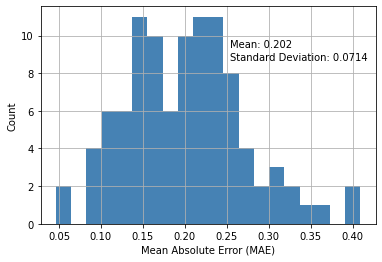

In [25]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
#ax.set_title('LSTM Model Bootstrap')
ax.grid()
ax.hist(np.asarray(mae), bins = 20, color='steelblue', label='Mean Absolute Error (MAE)')
ax.annotate('Mean: '+str(np.mean(mae, dtype=np.float16)), (.254, 9.4))
ax.annotate('Standard Deviation: '+str(np.std(mae, dtype=np.float16)), (.254, 8.7))
#ax.hist(np.asarray(loss), bins = 30, color='brown', label='Loss - Mean Squared Error')
ax.set_ylabel('Count')
ax.set_xlabel('Mean Absolute Error (MAE)')

fig.savefig('LSTM_bootstrap_testSet.eps')


In [124]:
mae = np.asarray(mae)

In [131]:
q3 = np.percentile(mae, .75)
q1 = np.percentile(mae, .25)
iqr = q3 -q1

In [141]:
print(iqr)
print(mae.std())

0.005243909731507318
0.049110171372973306


In [161]:
0.3 / (2*(iqr/np.cbrt(len(mae))))

132.7708447875568

# Trying to parallelize

In [53]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

from joblib import Parallel, delayed

from multiprocessing import Process, Manager


In [54]:

def bootstrapping(history, performance, SEED):
    
    file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

    filt = 'Highpass'

    #window_width = [1,2,5, 200]
    #window_width = [350, 400, 450, 500]
    ww = 200
    bs = 32

    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)



    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns, das_data_all, f  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=bs)
    print("Fold number: "+str(SEED))
    
    history['lstm_'+str(ww)+'_'+filt+'_Fold:'+str(SEED)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(ww)+'_'+filt+'_Fold:'+str(SEED)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(ww)+'_'+filt+'_Fold:'+str(SEED)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

In [55]:
manager = Manager()
history = manager.dict()
performance = manager.dict()

In [56]:
job = [Process(target=bootstrapping, args=(history, performance, i)) for i in range(51)]

In [57]:
_ = [p.start() for p in job]

In [58]:
_ = [p.join() for p in job]

In [59]:
print(performance)

{}


# residuals

In [2]:
fig, ax = plt.subplots(figsize = (10,8))
fig.patch.set_facecolor('white')

for i, j in zip(residuals.values(), true_discharge_vals.values()):
    ax.scatter(j , i, facecolor = 'None', edgecolor='steelblue')
#     print(i)
#     print(j)
ax.set_ylabel('Residual (m$^3$/s)', size = 12)
ax.set_xlabel('True Discharge (m$^3$/s)', size = 12)
ax.grid()
plt.show()


NameError: name 'plt' is not defined

In [203]:
mean_residuals = []
for i, j in zip(residuals.values(), true_discharge_vals.values()):
    mean_residuals.append(i)
    

In [206]:
mean_residuals = np.asarray(mean_residuals)

In [209]:
mean_residuals = mean_residuals.reshape(mean_residuals.shape[0]*mean_residuals.shape[1])

In [214]:
mean_res = mean_residuals.mean()
std_dev_res = mean_residuals.std()

In [215]:
std_dev_res

0.9454294

# HeatMap

In [27]:
trueD = []
resD = []

for i, j in zip(residuals.values(), true_discharge_vals.values()):
    #ax.scatter(j , i, facecolor = 'None', edgecolor='steelblue')
    resD.append(i)
    trueD.append(j)

In [34]:
trueD = np.asarray(trueD)
resD = np.asarray(resD)
trueD = np.reshape(trueD, trueD.shape[0]*trueD.shape[1])
resD = np.reshape(resD, resD.shape[0]*resD.shape[1])

In [4]:
fig, ax = plt.subplots(figsize = (10,8))
fig.patch.set_facecolor('white')

c = ax.hist2d(trueD, resD, bins=[18,18])
ax.set_ylabel('Residual (m$^3$/s)', size = 12)
ax.set_xlabel('True Discharge (m$^3$/s)', size = 12)
ax.grid()

cbar = fig.colorbar(c[3], ax=ax)
cbar.set_label('Count', rotation=270)

fig.savefig('LSTM_bootstrap_testSet_heatmap.eps')
plt.show()

NameError: name 'plt' is not defined